In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import random
import numpy as np
from tqdm.auto import tqdm

from scipy import stats

import random
import re
from dateutil.parser import parse

import warnings  
warnings.filterwarnings('ignore')

import os


Using TensorFlow backend.


In [2]:
def createGap(df,start,end):
    """
    Creating a Gap
    input:
        start: seed
        end: seed + gap
    output:
        df: dataframe with index => DisplayTime value => GlucoseValues and a gap from start to end (inputs)
    """

    #df = readData()
    l = len(df.index)
    if end>l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]=float("NaN")
    
    return df

In [3]:
#Extract Data
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/Data/Ohio-Data/OhioFullConsolidated.csv")
data = data[data['subjectId']=='OD552']
data = data.reset_index(drop=True)
data

,subjectId,Display Time,GlucoseValue
0,OD552,4/16/25 11:17,95
1,OD552,4/16/25 11:22,86
2,OD552,4/16/25 11:27,81
3,OD552,4/16/25 11:32,81
4,OD552,4/16/25 11:37,82
...,...,...,...
11439,OD552,6/7/25 16:49,238
11440,OD552,6/7/25 16:54,233
11441,OD552,6/7/25 16:59,229
11442,OD552,6/7/25 17:04,224


In [106]:
#1 week after : 1890, 1974, 2003, 2196, 2378, 2581, 2751, 3190, 3223, 3301
#2 weeks after: 3600, 3797, 3828, 3939, 4210, 4353, 4567, 4890, 5102, 5200
#3 weeks after: 5500, 5681, 5727, 5893, 5919, 6060, 6143, 6250, 6492, 6600
#4 weeks after: 7000, 7296, 7384, 7557, 7572, 7698, 7839, 7934, 8190, 8250
#5 weeks after: 8500, 8670, 8792, 8810, 8972, 9009, 9380, 9592, 9715, 9800
#6 weeks after: 10100, 10274, 10453, 10679, 10712, 10890, 109100, 11069, 11170, 11200
seed_points = [10100, 10274, 10453, 10679, 10712, 10890, 10910, 11069, 11170, 11200]

# 

In [107]:
# obj = glucoCheckOps()

In [108]:

#for gap size 50
ioa_gap50 = list()


for seed in tqdm(seed_points):
    start = seed
    end = seed+49
    
    dataWithMissing = data.copy()
    dataWithMissing = createGap(dataWithMissing,start,end)
    
    dataBeforeGap = dataWithMissing[:seed]
    
    obj = glucoCheckOps()
#     obj.train(dataBeforeGap);
    imputed_data = obj.impute(dataWithMissing)

    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    del obj

    ioa_gap50.append(ioa)

ioa_gap50

Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!



[0.6152307064249909,
 0.42340234137098764,
 0.31026570895699146,
 0.806537720973527,
 0.0881566266364906,
 0.40890147884062344,
 0.45974380624878497,
 0.08291213593607172,
 0.07768133944301148,
 0.90984842839771]

In [109]:
#for gap size 30
ioa_gap30 = list()

for seed in tqdm(seed_points):
    start = seed
    end = start+29
    
    dataWithMissing = data.copy()
    dataWithMissing = createGap(dataWithMissing,start,end)
    
    dataBeforeGap = dataWithMissing[:seed]
    
    obj = glucoCheckOps()
#     obj.train(dataBeforeGap);
    imputed_data = obj.impute(dataWithMissing)

    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))  
    
    del obj

    ioa_gap30.append(ioa)

ioa_gap30


Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!
Gap < 50; We use LSTM imputations
Training Model...


Model trained successfully!



[0.8983005655518829,
 0.8735163999963007,
 0.37900225738549065,
 0.09353003263493753,
 0.40855898540860325,
 0.24242437136162764,
 0.6123195380173243,
 0.09244300748201295,
 0.14972946341148086,
 0.38613779765781253]

In [110]:
#for gap size 12
ioa_gap15 = list()


for seed in tqdm(seed_points):
    start = seed
    end = start+12
    
    dataWithMissing = data.copy()
    dataWithMissing = createGap(dataWithMissing,start,end)
    
    dataBeforeGap = dataWithMissing[:seed]
    
    obj = glucoCheckOps()
#     obj.train(dataBeforeGap);
    imputed_data = obj.impute(dataWithMissing)

    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))  
    
    del obj
    
    ioa_gap15.append(ioa)

ioa_gap15

Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations
Gap < 15; We use the spline imputations



[0.9668900387262722,
 0.24783741102589452,
 0.7624034268936788,
 0.5209199471105266,
 0.9994900926846296,
 0.4824631657548668,
 0.43213295341056934,
 0.6234693379819551,
 0.7120380460765696,
 0.4403790006745705]

In [111]:
#for gap size 100
ioa_gap100 = list()

for seed in tqdm(seed_points):
    start = seed
    end = seed+99
    
    dataWithMissing = data.copy()
    dataWithMissing = createGap(dataWithMissing,start,end)
    
    dataBeforeGap = dataWithMissing[:seed]
    
    obj = glucoCheckOps()
#     obj.train(dataBeforeGap);
    imputed_data = obj.impute(dataWithMissing)
    
    if isinstance(imputed_data, pd.DataFrame):
        ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
        ioa_gap100.append(ioa)
    else:
        ioa_gap100.append(0)

    del obj

    
    
ioa_gap100

We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data
We cannot impute this data



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [112]:



#for gap size 5
ioa_gap5 = list()
# fb_gap5 = list()
# mad_gap5 = list()
# rmse_gap5 = list()
# mape_gap5 = list()

for seed in tqdm(seed_points):
    start = seed
    end = start+4
    
    dataWithMissing = data.copy()
    dataWithMissing = createGap(dataWithMissing,start,end)
    
    dataBeforeGap = dataWithMissing[:seed]
    
    obj = glucoCheckOps()
#     obj.train(dataBeforeGap);
    imputed_data = obj.impute(dataWithMissing)

    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))  
    
    del obj
    
    ioa_gap5.append(ioa)




ioa_gap5

Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations
Gap < 5; We use the linear imputations



[0.5696846388606309,
 0.5805958747135238,
 0.5314991402219784,
 0.40090681302947107,
 0.9984563431923048,
 0.5106697708037422,
 0.6563584727043223,
 0.9923385625684057,
 0.8811609360700743,
 0.39981224951558103]

In [113]:
IOA = pd.DataFrame({'Seeds':seed_points, 'Gap:5':ioa_gap5, 'Gap:12':ioa_gap15, 'Gap:30':ioa_gap30, 'Gap:50':ioa_gap50,'Gap:100':ioa_gap100})
IOA


,Seeds,Gap:5,Gap:12,Gap:30,Gap:50,Gap:100
0,10100,0.569685,0.966890,0.898301,0.615231,0
1,10274,0.580596,0.247837,0.873516,0.423402,0
2,10453,0.531499,0.762403,0.379002,0.310266,0
3,10679,0.400907,0.520920,0.093530,0.806538,0
4,10712,0.998456,0.999490,0.408559,0.088157,0
5,10890,0.510670,0.482463,0.242424,0.408901,0
6,10910,0.656358,0.432133,0.612320,0.459744,0
7,11069,0.992339,0.623469,0.092443,0.082912,0
8,11170,0.881161,0.712038,0.149729,0.077681,0
9,11200,0.399812,0.440379,0.386138,0.909848,0


In [114]:
IOA.to_csv("~/Desktop/6week.csv")

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [116]:
# IOA

In [117]:
gaps = [5,15,30,50,100]
ioa = []
ioa.append(IOA['Gap:5'].mean())
ioa.append(IOA['Gap:12'].mean())
ioa.append(IOA['Gap:30'].mean())
ioa.append(IOA['Gap:50'].mean())
ioa.append(IOA['Gap:100'].mean())
ioa

[0.6521482801680035,
 0.6188023420339535,
 0.41359624189074734,
 0.41826802932291895,
 0.0]

Text(0, 0.5, 'IOA value')

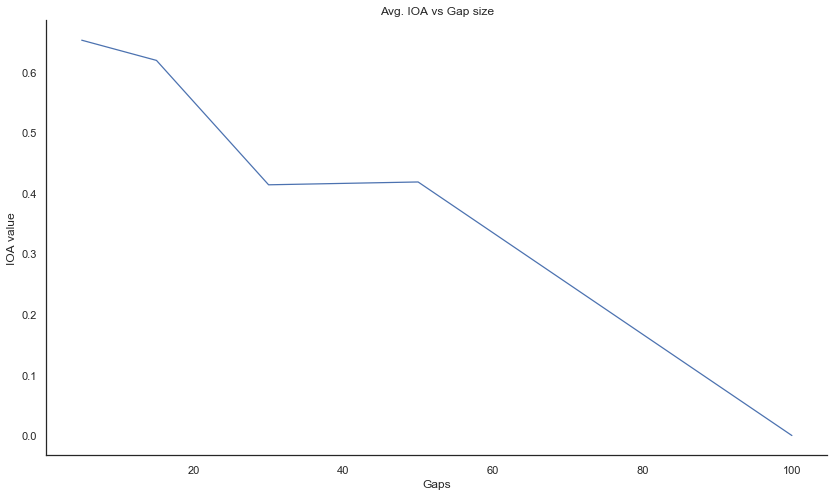

In [118]:
plt.figure(figsize=(14,8))
plt.title("Avg. IOA vs Gap size")
sns.set(style="white")
fig = sns.lineplot(x = gaps, y = ioa, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gaps')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

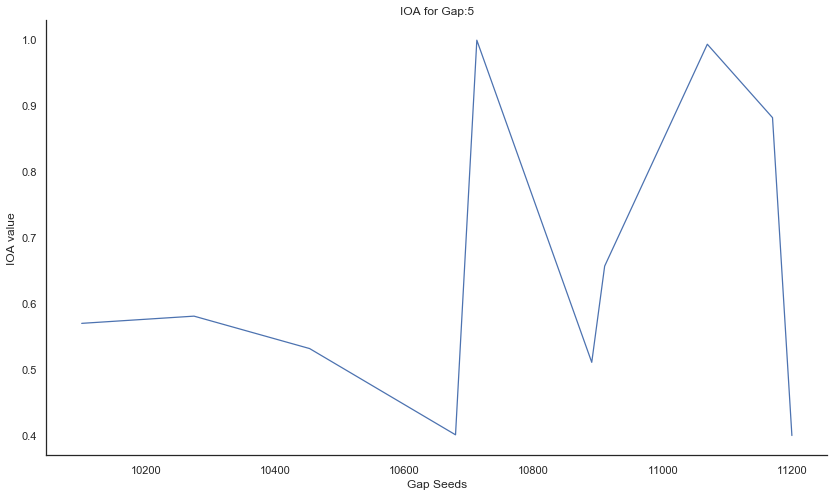

In [119]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:5")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:5'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

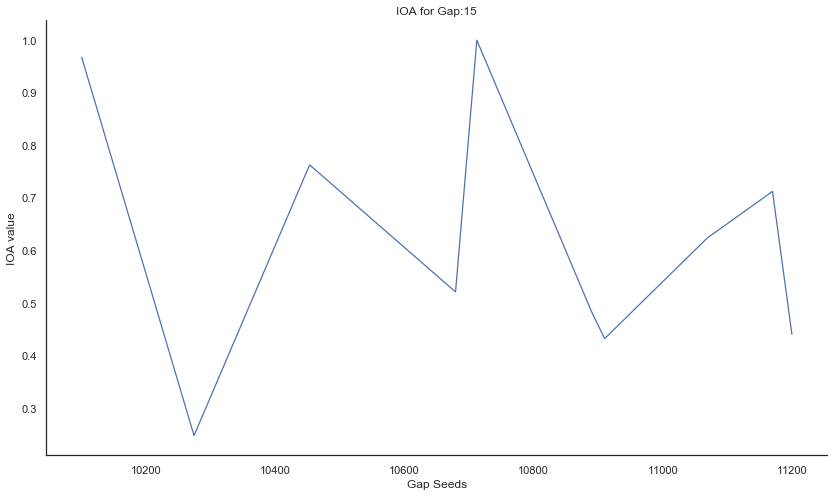

In [120]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:15")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:12'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

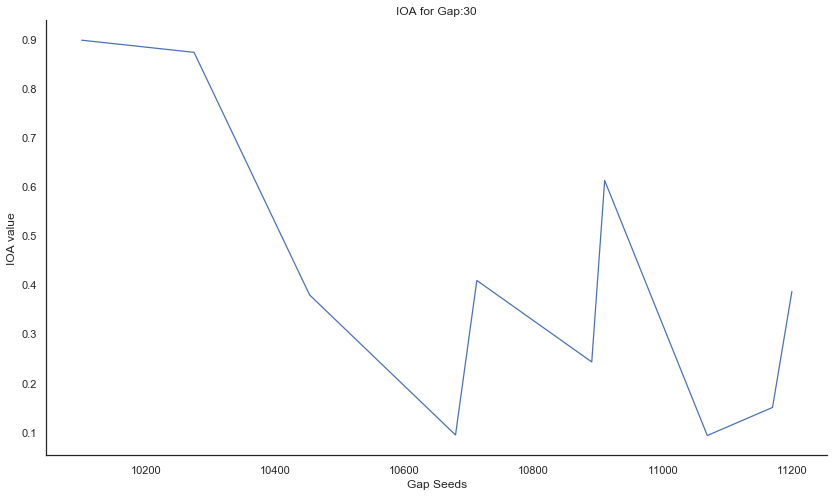

In [121]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:30")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:30'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

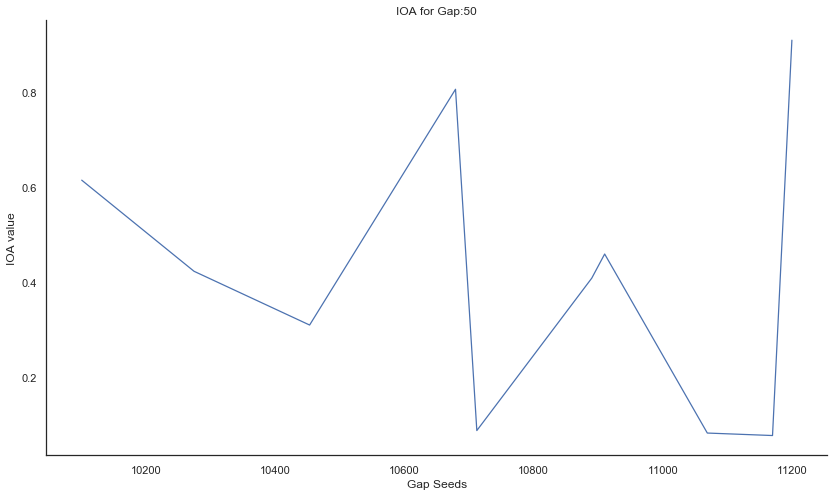

In [122]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:50")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:50'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

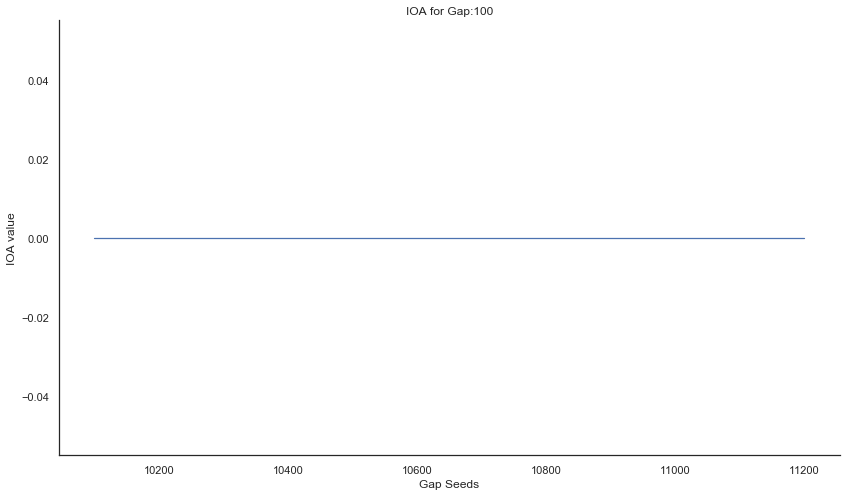

In [123]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:100")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:100'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()
fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

#### 

In [22]:
# MAD = pd.DataFrame({'Gap:5':mad_gap5, 'Gap:15':mad_gap15, 'Gap:30':mad_gap30, 'Gap:50':mad_gap50, 'Gap:100':mad_gap100})
# MAD

In [23]:
# FB = pd.DataFrame({'Gap:5':fb_gap5, 'Gap:15':fb_gap15, 'Gap:30':fb_gap30, 'Gap:50':fb_gap50, 'Gap:100':fb_gap100})
# FB

In [24]:
# RMSE = pd.DataFrame({'Gap:5':rmse_gap5, 'Gap:15':rmse_gap15, 'Gap:30':rmse_gap30, 'Gap:50':rmse_gap50, 'Gap:100':rmse_gap100})
# RMSE

In [25]:
# MAPE = pd.DataFrame({'Gap:5':mape_gap5, 'Gap:15':mape_gap15, 'Gap:30':mape_gap30, 'Gap:50':mape_gap50, 'Gap:100':mape_gap100})
# MAPE

In [26]:
# IOA.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/IOA.csv")
# FB.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/FB.csv")
# RMSE.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/RMSE.csv")
# MAPE.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/MAPE.csv")
# MAD.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/MAD.csv")